<a href="https://colab.research.google.com/github/SaranyaKannan28/MAINFLOW/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (200, 5)
Column Names: Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
Missing values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


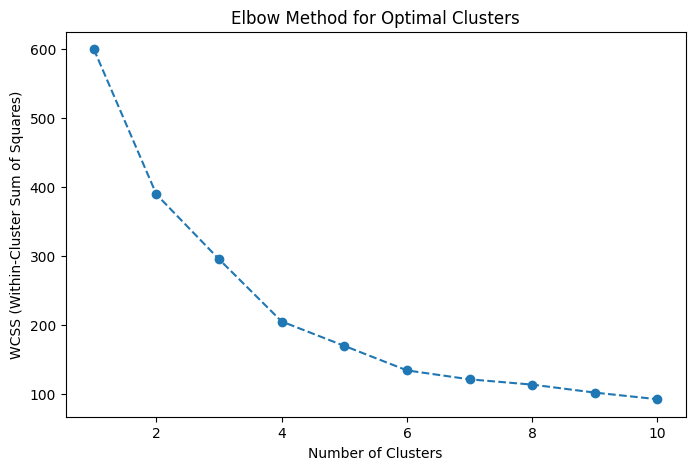

Silhouette Score for 2 clusters: 0.335
Silhouette Score for 3 clusters: 0.358
Silhouette Score for 4 clusters: 0.404
Silhouette Score for 5 clusters: 0.408
Silhouette Score for 6 clusters: 0.431
Silhouette Score for 7 clusters: 0.410
Silhouette Score for 8 clusters: 0.367
Silhouette Score for 9 clusters: 0.374
Silhouette Score for 10 clusters: 0.362


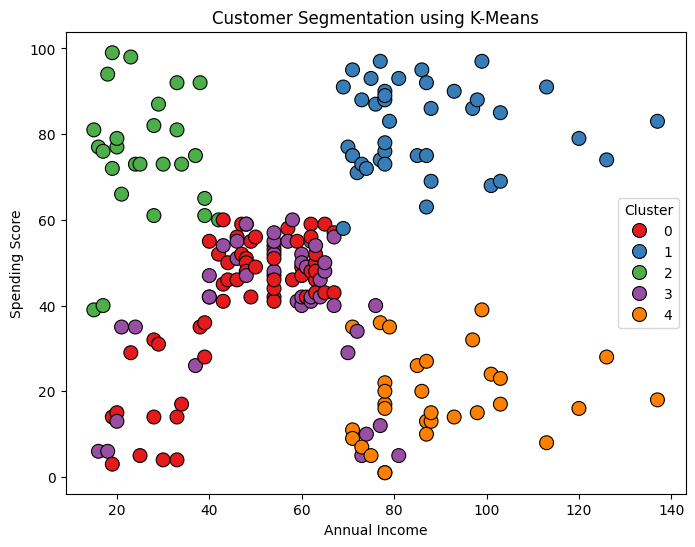

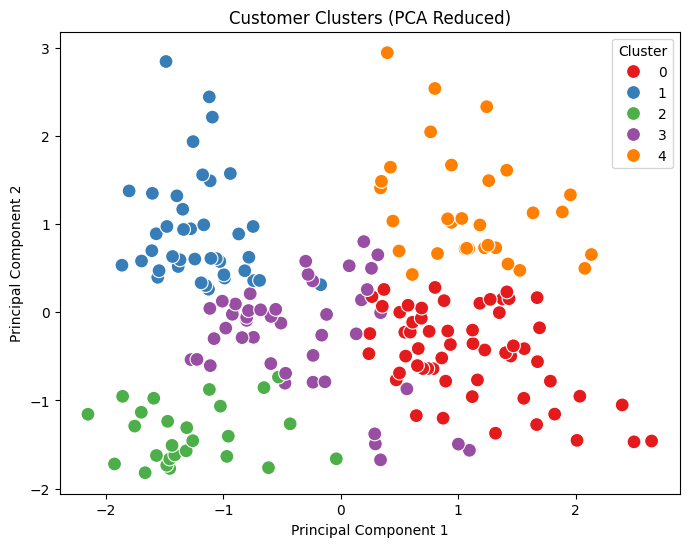

Cluster Centroids:
 [[55.27586207 47.62068966 41.70689655]
 [32.875      86.1        81.525     ]
 [25.76923077 26.11538462 74.84615385]
 [26.73333333 54.31111111 40.91111111]
 [44.38709677 89.77419355 18.48387097]]


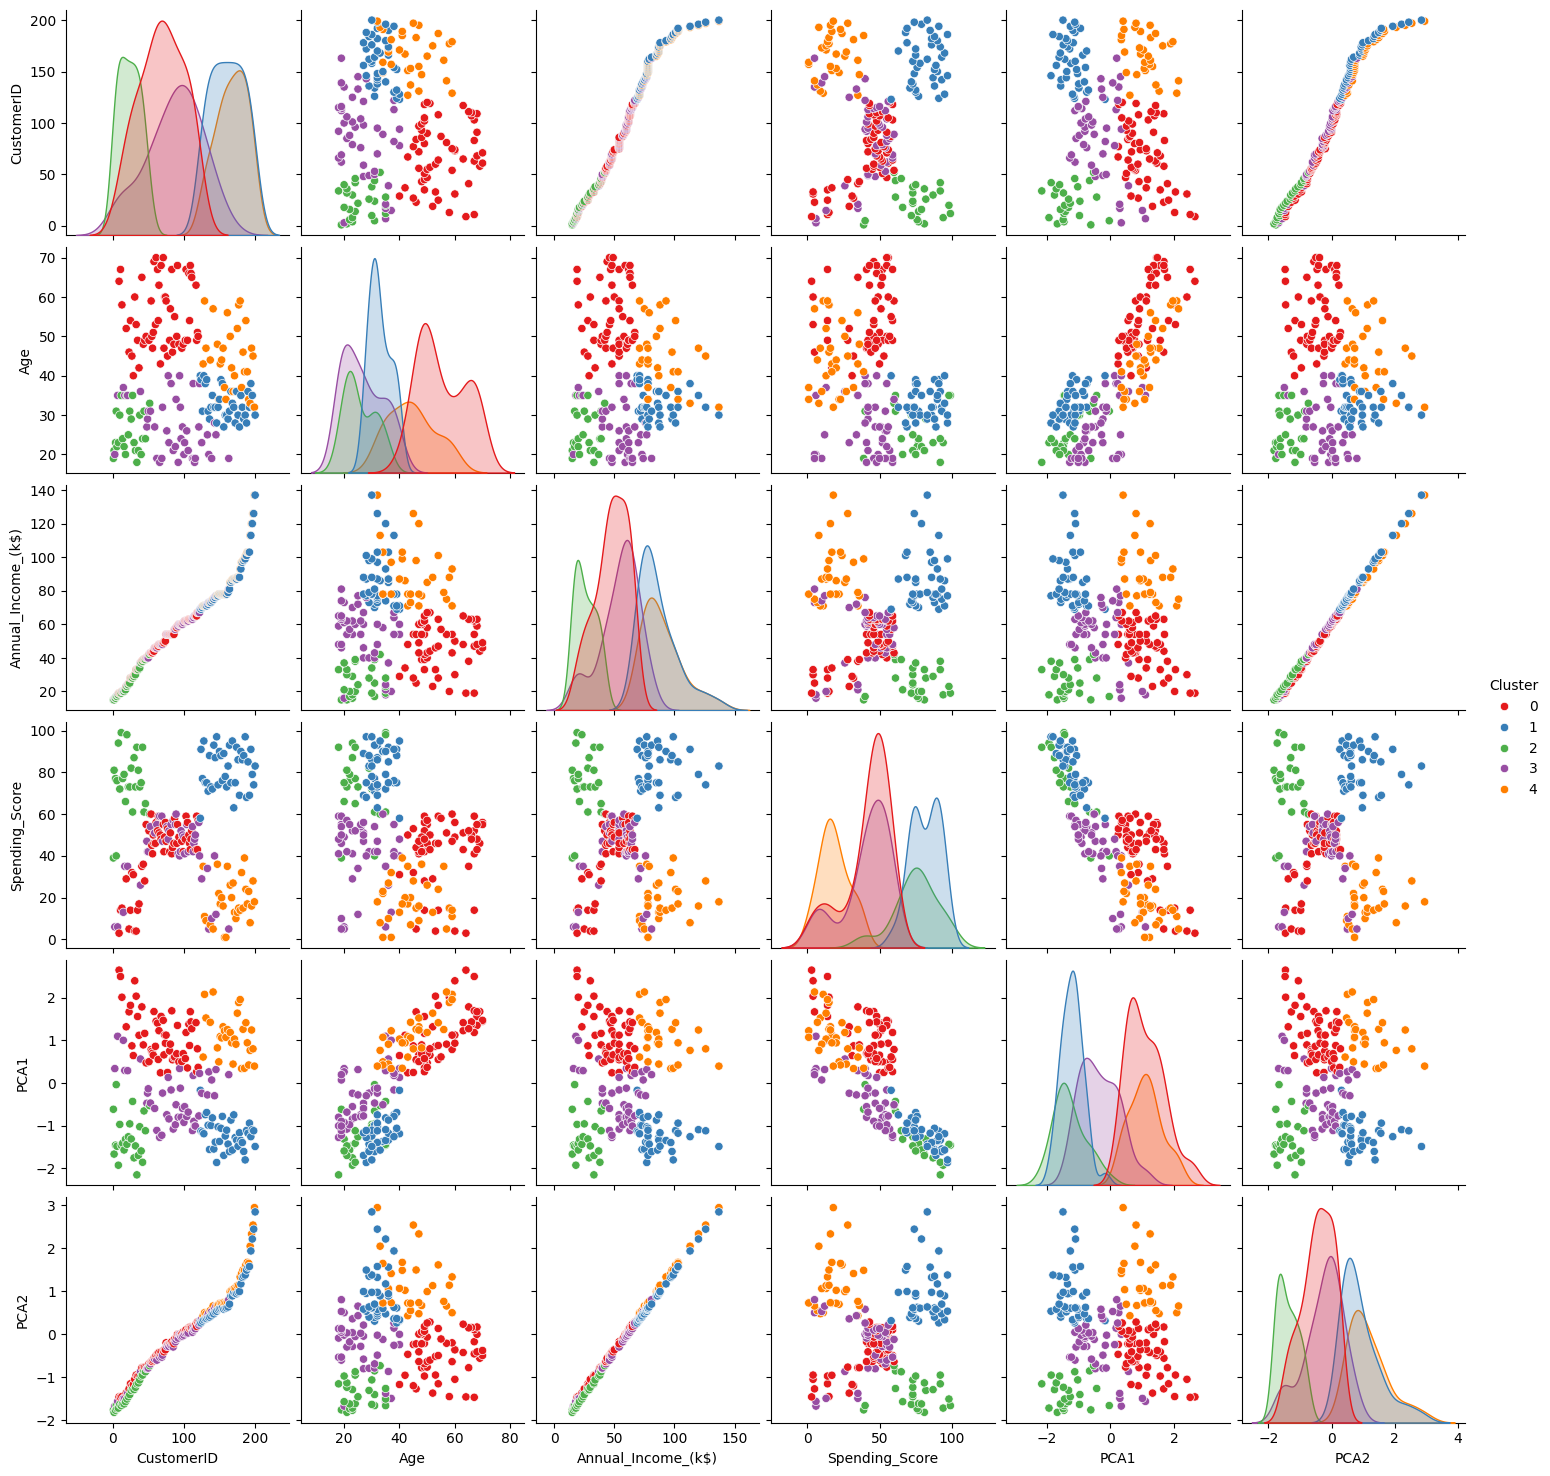

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)
df.columns

print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print(df.head())


df.columns = df.columns.str.strip()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print("Missing values:\n", df.isnull().sum())

features = ['Age', 'Annual_Income_(k$)', 'Spending_Score']
data = df[features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")

best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual_Income_(k$)"], y=df["Spending_Score"],
                hue=df["Cluster"], palette="Set1", s=100, edgecolor="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.legend(title="Cluster")
plt.show()

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df["PCA1"], df["PCA2"] = data_pca[:, 0], data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="Set1", s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Clusters (PCA Reduced)")
plt.show()

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centroids:\n", centroids)

sns.pairplot(df, hue="Cluster", palette="Set1")
plt.show()
